--- Krok 1: Wczytywanie i wizualizacja sygnału EKG ---
Pomyślnie wczytano sygnał 'ekg100.txt'.
Liczba próbek: 650000
Czas trwania sygnału: 1805.55 s
Częstotliwość próbkowania (fs): 360 Hz


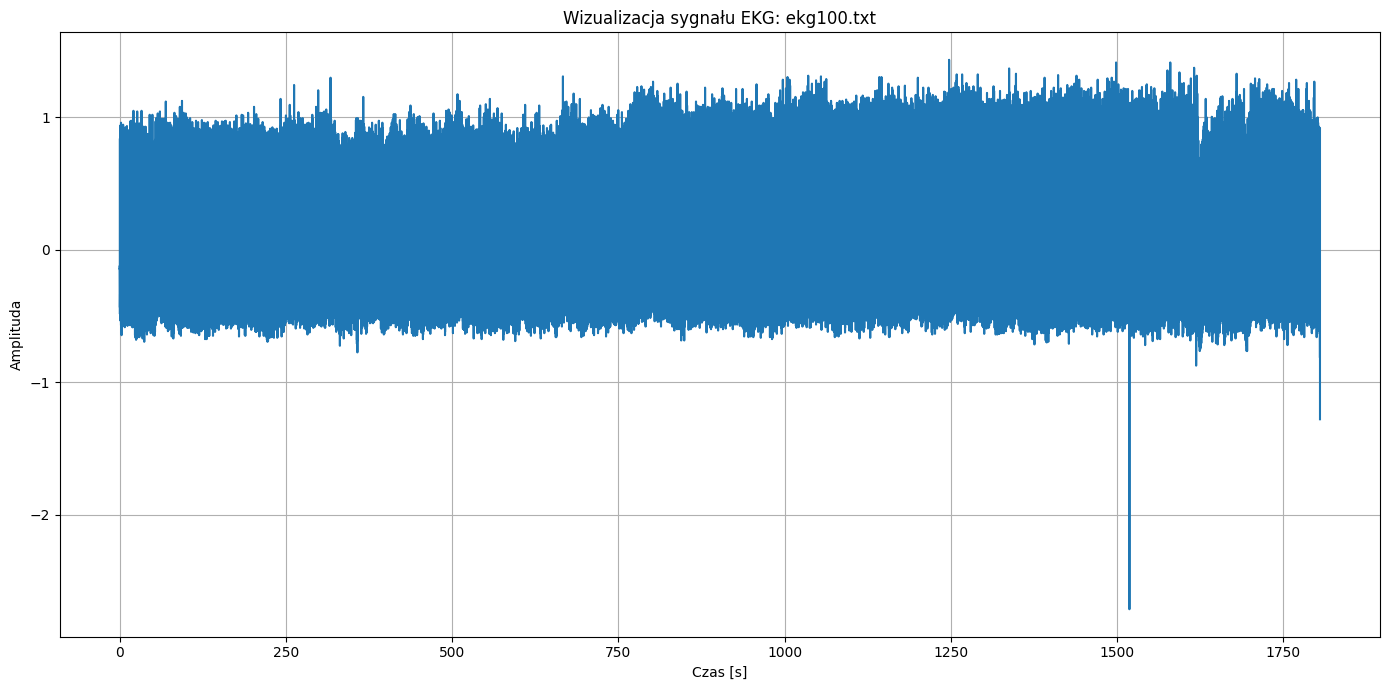


--- Krok 2: Wyznaczanie i wizualizacja widma amplitudowego ---


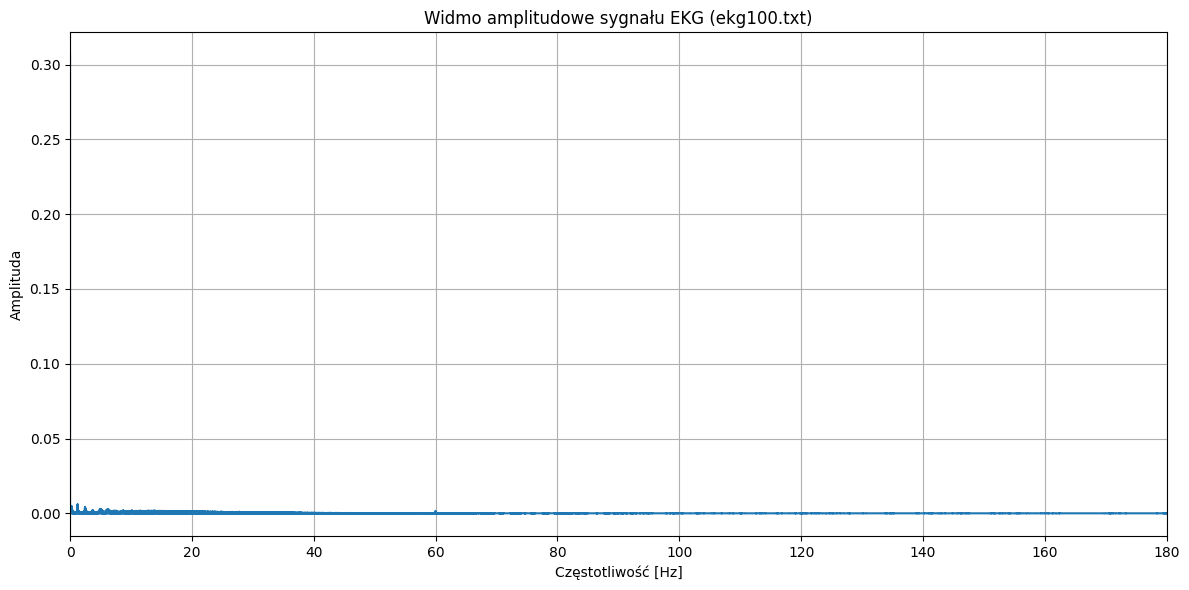


--- Krok 3: Wyznaczanie odwrotnej FFT i porównanie z oryginałem ---


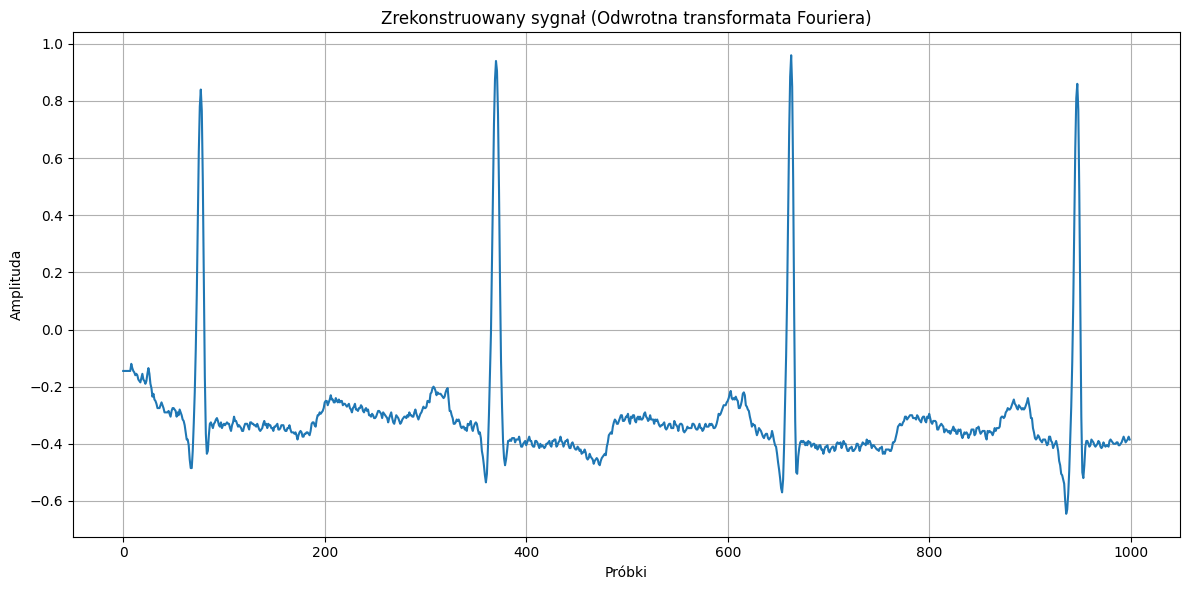

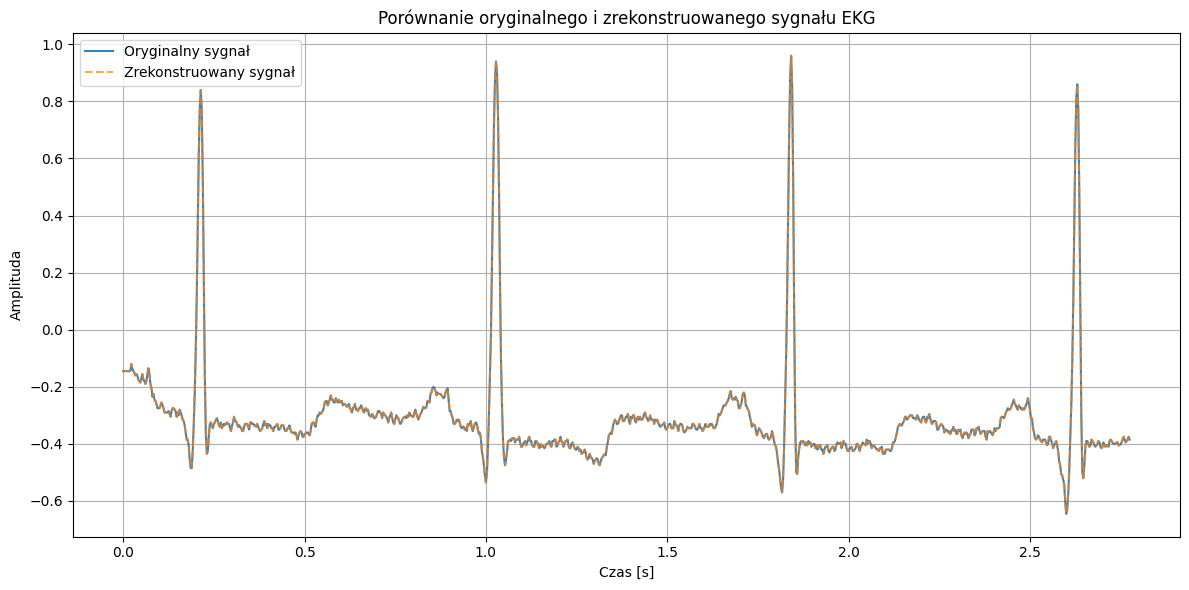

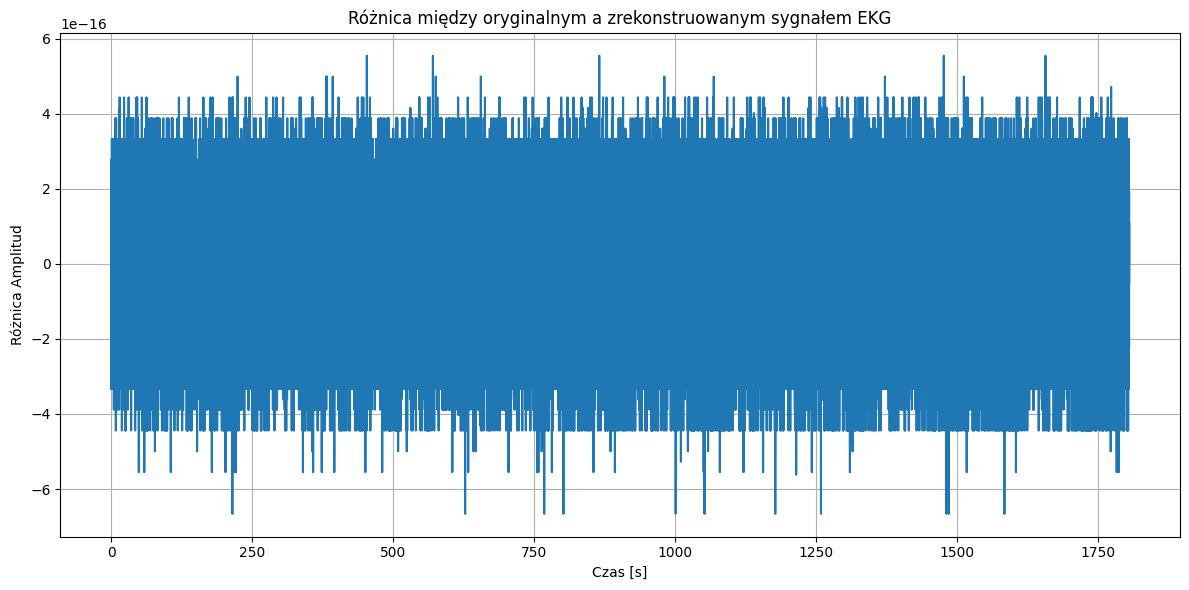


Średnia bezwzględna różnica między sygnałem oryginalnym a zrekonstruowanym: 0.000000
Różnica jest bardzo mała, co wskazuje na udaną rekonstrukcję.

--- Ćwiczenie 3 zakończone ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function to load the EKG signal ---
def load_ekg_signal(file_name="ekg100.txt"):
    """
    Wczytuje sygnał EKG z pliku.
    Dla ekg100.txt zakłada się częstotliwość próbkowania 360 Hz.
    """
    try:
        # Assuming the file is in a 'sygnaly-testowe' directory
        data = np.loadtxt(f'sygnaly-testowe/{file_name}')
    except FileNotFoundError:
        print(f"Błąd: Plik '{file_name}' nie znaleziono w folderze 'sygnaly-testowe/'.")
        print("Upewnij się, że plik jest w odpowiedniej lokalizacji.")
        return None, None, None

    signal = data
    # As specified in previous exercises, ekg100.txt has fs = 360 Hz
    sampling_rate = 360
    time = np.linspace(0, len(signal) / sampling_rate, len(signal), endpoint=False)

    print(f"Pomyślnie wczytano sygnał '{file_name}'.")
    print(f"Liczba próbek: {len(signal)}")
    print(f"Czas trwania sygnału: {time[-1]:.2f} s")
    print(f"Częstotliwość próbkowania (fs): {sampling_rate} Hz")

    return time, signal, sampling_rate

# --- Function to compute and plot DFT (Amplitude Spectrum) ---
def compute_and_plot_fft(signal, sampling_rate, title="Widmo amplitudowe sygnału EKG"):
    """
    Wyznacza dyskretną transformatę Fouriera sygnału i przedstawia
    widmo amplitudowe w zakresie częstotliwości [0, fs/2].
    """
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1 / sampling_rate)
    fft_values = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_values) / N

    positive_freq_indices = np.where(freqs >= 0)
    freqs_positive = freqs[positive_freq_indices]
    fft_magnitude_positive = fft_magnitude[positive_freq_indices]

    plt.figure(figsize=(12, 6))
    plt.plot(freqs_positive, fft_magnitude_positive)
    plt.title(title)
    plt.xlabel("Częstotliwość [Hz]")
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.xlim(0, sampling_rate / 2)
    plt.tight_layout()
    plt.show()

# --- Function to compute and plot IFFT, and compare with original ---
def compute_ifft_and_compare(original_time, original_signal, fft_values, plot_samples_limit=1000):
    """
    Wyznacza odwrotną dyskretną transformatę Fouriera i porównuje
    z pierwotnym sygnałem. Wyświetla fragmenty sygnałów.
    """
    reconstructed_signal = np.fft.ifft(fft_values).real

    # Determine the number of samples to plot
    plot_len = min(len(original_signal), plot_samples_limit)

    # --- Plotting Reconstructed Signal Fragment ---
    plt.figure(figsize=(12, 6))
    plt.plot(original_time[:plot_len], reconstructed_signal[:plot_len])
    plt.title("Zrekonstruowany sygnał (Odwrotna transformata Fouriera - Fragment)")
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Comparison Plot: Original vs. Reconstructed Fragment ---
    plt.figure(figsize=(12, 6))
    plt.plot(original_time[:plot_len], original_signal[:plot_len], label="Oryginalny sygnał", alpha=0.9)
    plt.plot(original_time[:plot_len], reconstructed_signal[:plot_len], label="Zrekonstruowany sygnał", linestyle="dashed", alpha=0.7)
    plt.title("Porównanie oryginalnego i zrekonstruowanego sygnału EKG (Fragment)")
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Plotting the difference fragment ---
    difference_signal = original_signal - reconstructed_signal
    plt.figure(figsize=(12, 6))
    plt.plot(original_time[:plot_len], difference_signal[:plot_len])
    plt.title("Różnica między oryginalnym a zrekonstruowanym sygnałem EKG (Fragment)")
    plt.xlabel("Czas [s]")
    plt.ylabel("Różnica Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate and print statistical difference (e.g., Mean Absolute Error) for the whole signal
    mae = np.mean(np.abs(difference_signal))
    print(f"\nŚrednia bezwzględna różnica między sygnałem oryginalnym a zrekonstruowanym (cały sygnał): {mae:.6f}")
    if mae < 1e-9:
        print("Różnica jest bardzo mała, co wskazuje na udaną rekonstrukcję.")
    else:
        print("Istnieje pewna różnica, co może wynikać z błędów numerycznych lub zaokrągleń.")


# --- Main execution for Exercise 3 ---
if __name__ == "__main__":
    file_name = "ekg100.txt"
    plot_limit = 1000 # Define the number of samples for fragments

    # Krok 1: Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie
    print("--- Krok 1: Wczytywanie i wizualizacja sygnału EKG ---")
    time_ekg, signal_ekg, fs_ekg = load_ekg_signal(file_name)

    if signal_ekg is None:
        print("Nie można kontynuować ćwiczenia bez wczytanego sygnału.")
    else:
        # Initial plot of a fragment of the original signal
        plt.figure(figsize=(14, 7))
        plt.plot(time_ekg[:plot_limit], signal_ekg[:plot_limit])
        plt.title(f"Wizualizacja sygnału EKG: {file_name} (Fragment)")
        plt.xlabel("Czas [s]")
        plt.ylabel("Amplituda")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Krok 2: Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe
        print("\n--- Krok 2: Wyznaczanie i wizualizacja widma amplitudowego ---")
        fft_values_ekg = np.fft.fft(signal_ekg)
        compute_and_plot_fft(signal_ekg, fs_ekg, title=f"Widmo amplitudowe sygnału EKG ({file_name})")

        # Krok 3: Wyznaczyć odwrotną transformatę Fouriera i porównać z pierwotnym sygnałem
        print("\n--- Krok 3: Wyznaczanie odwrotnej FFT i porównanie z oryginałem ---")
        compute_ifft_and_compare(time_ekg, signal_ekg, fft_values_ekg, plot_samples_limit=plot_limit)

    print("\n--- Ćwiczenie 3 zakończone ---")